In [ ]:
# Il ne faut jamais évaluer la performance de son modèle sur les données d'entrainement

## Quand on fait du ml on divise toujours nos données en deux parties; Train & Test , 80% / 20%

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


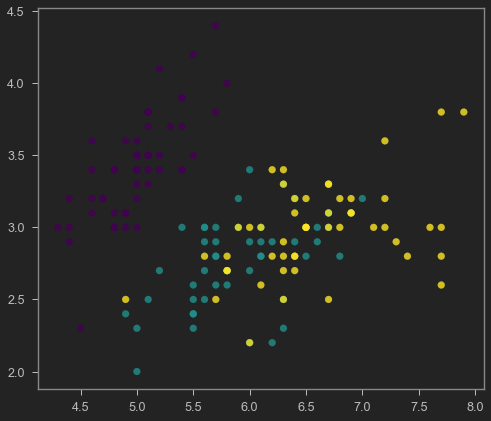

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)


# Séparation de nos données en échantillon de test de d'apprentissage 

In [4]:
# On a donc 150 observations. 
## Pour diviser notre dataset on import alors le module suivant

from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5) 

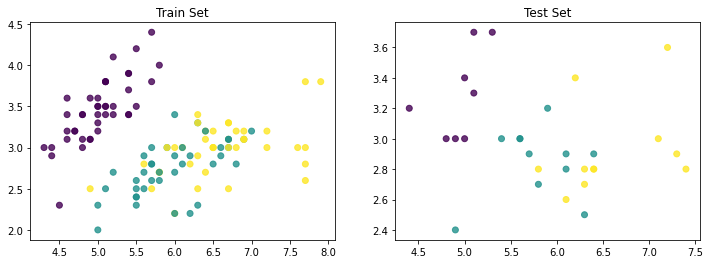

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Train Set')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.subplot(122)
plt.title('Test Set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)


# Entrainement d'un modèle de ML

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

model.score(X_train, y_train)

# On obtient alors un modèle avec une "précision" de 100%

1.0

In [13]:
# Mais cela ne veut pas dire que notre modèle sait inférer à la perfection le type de plante si on lui donne ces 4 variables

# Il faut tester sur l'échantillon de test ! 

print ('Train Score : ',model.score(X_train, y_train))
print ('Test Score : ',model.score(X_test, y_test))


Train Score :  1.0
Test Score :  0.9


In [14]:
# Il faut maintenant chercher à améliorer ces score en modifiant les hyperparamètres

model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

print ('Train Score : ',model.score(X_train, y_train))
print ('Test Score : ',model.score(X_test, y_test))


Train Score :  0.975
Test Score :  0.9333333333333333


In [ ]:
# Attention, si on change nos hyperparamètres pour optimiser le score de notre Test set 

# ALORS ON NE PEUT PLUS EVALUER NOTRE MODELE SUR LE TEST SET

## POUR EVALUER UN MODEL IL FAUT LUI SOUMETTRE DES DONNEES QU'IL N'A JAMAIS VU

### Avec notre démarche actuelle, notre modèle à déjà INDIRECTEMENT vu nos données puisqu'il est réglé dessus


In [ ]:
# On va donc découper une troisième partie dans nos données; un VALIDATION test


In [ ]:
# Donc, quand on veut comparer deux modèles (ex : Kneigbors avec 3 & 6 voisins)

## 1 _ On commence par entrainer nos modèles respectifs sur le Train_Set 

### 2 _ Puis on selectionnera celui qui à la meilleur performance sur le Validation_Set

#### 3 _ Enfin, on évaluera notre modèle sur notre Test_Set, afin d'avoir une idée de sa performance dans la vraie vie


In [ ]:
# Mais qu'est ce qui nous garantie que la facon dont on découpe notre dataset est la bonne ? 


### Cross_Validation

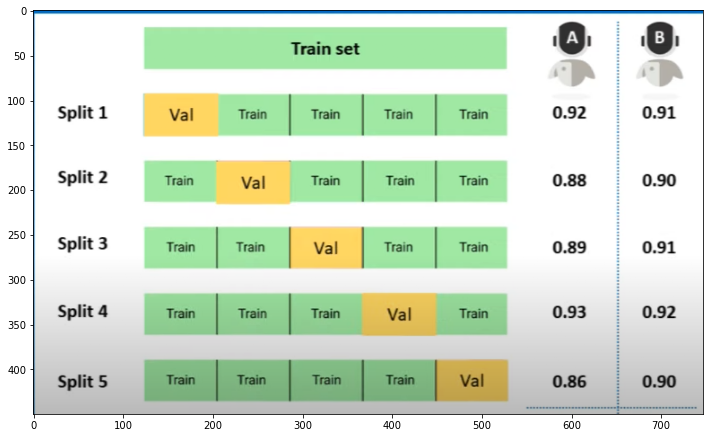

In [15]:
# On utlise alors la Cross_Validation

## On va diviser notre dataset en plus de partie (ici 5) 

### L'entrainer sur 4, puis le tester sur la 5e

#### Ensuite on refait cela pour toutes les divisions possibles 

#### Pour finalement faire la moyenne des 5 scores  
    
image = plt.imread('Cross_Validation.png')
plt.figure(figsize=(12,8))
plt.imshow(image)

In [16]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score (KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

# On obtient nos 5 scores

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [26]:
# Il suffit alors d'en faire la moyenne, et de faire cela pour différents nombre de 'neighbors'

print(cross_val_score (KNeighborsClassifier(1), X_train, y_train, cv=5, scoring='accuracy').mean())
print(cross_val_score (KNeighborsClassifier(3), X_train, y_train, cv=5, scoring='accuracy').mean())
print(cross_val_score (KNeighborsClassifier(6), X_train, y_train, cv=5, scoring='accuracy').mean())

0.975
0.975
0.9583333333333334


In [27]:
# On peut évidement faire une boucle 'for' pour tester cela plus rapidement

def test(a, b):
    val_score = []
    for i in range (a, b):
        score = cross_val_score (KNeighborsClassifier(i), X_train, y_train, cv=5).mean()
        val_score.append(score)
    return(val_score)



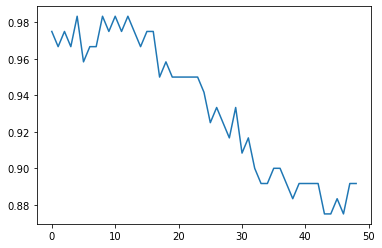

In [28]:
plt.plot(test(1,50))

# Il existe une fonction qui fait déjà tout ça automatiquement, Validation Curve

### Validation Curve 

In [29]:
from sklearn.model_selection import validation_curve

In [30]:
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5) 

In [34]:
model = KNeighborsClassifier()
i = np.arange(1,50)

Train_Score, Val_Score = validation_curve(model, X_train, y_train, "n_neighbors", i, cv=5)

C:\Users\witec\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [65]:
Val_Score.mean(axis=1).mean()

0.9331632653061225

In [94]:
# Il faut faire attention aux cas d'overfitting

### Overfitting 

In [ ]:
# C'est à dire quand la machine à perdu tout sens de généralisation car elle a cherché à trop se perfectionner sur le train set

## Lorsque l'on a un très bon score à l'entrainement mais un mauvais score à la validation 

### Dans le cas d'un modèle "KNeighbors", c'est très généralement le cas avec un nombre de 'voisin' égale à 1

#### Ce qui se voit clairement sur le graphe ci_dessous, très utile pour repérer les cas d'overfitting

In [2]:
plt.figure(figsize=(12,8))

plt.plot(i, Val_Score.mean(axis=1), label = 'Validation_Score')
plt.plot(i, Train_Score.mean(axis=1), label='Train')

plt.legend()
plt.xlabel('Nombres de "neighbors"')
plt.ylabel('Score')


NameError: name 'plt' is not defined

### Les autres hyperparamètres _ Grid Search CV

In [ ]:
# Ils existent d'autres hyperparamètres.

## Pour un modèle KNeighbors, qui utilise donc la 'distance',on peut prendre une distance de Manhattan ou Euclidienne etc..
## On peut égalment choisir d'accorder (ou non) des coefficient sur nos distances, et donc choisir la valeur de ces coefs, etc..

### En réglant ces autres hyperparamètres, on peut alors potentiellement obtenir un meilleur Score

#### Pour test tous ces paramètres, on utilise GridSerach CV

In [ ]:
# GridSearchCV construit une grille de modèle avec toutes les combinaisons d'hyperparamètres 

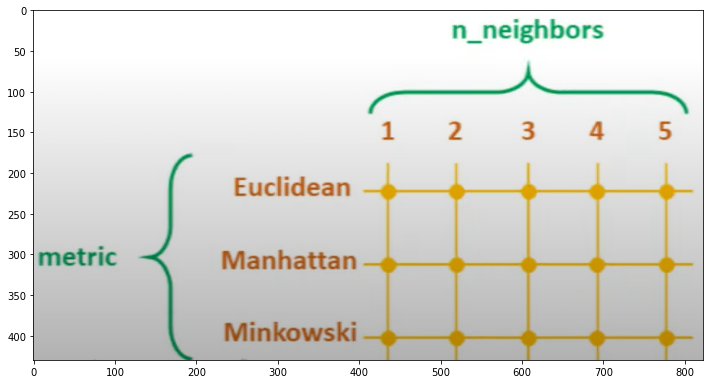

In [37]:
plt.figure(figsize=(12,9))
image = plt.imread('GridSearchCV.png')
plt.imshow(image)

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# Il nous faut maintenant définir notre dictonnaire qui va contenir les différents hyperparamètres que l'on souhaite optimiser
# ainsi que les différentes valeurs de ces huperparamètres

param_grid = { 'n_neighbors': np.arange(1,20),
             'metric': ['euclidean', 'manhattan']}

# Il nous suffit alors de faire passer notre modèle ainsi que notre dictionnaire dans la fonction GridSearch CV et un nombre
# pour notre Cross_Validation

In [40]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# On obtient alors un grille qui contient plusieurs estimateurs

## On va donc "Entrainer" cette grille avec la méthode "fit", en utilisant bien sûr les données du notre "Train_Set"

In [41]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [42]:
# On peut alors voir le meilleur score obtenue

grid.best_score_

0.9833333333333334

In [43]:
# Voir avec quels paramètres ce score est obtenue

grid.best_params_

# Notre modèle optimal (avec ces données), utilise donc une distance de type euclidienne et un nombre de voison égal à 5 !

{'metric': 'euclidean', 'n_neighbors': 5}

In [44]:
# On peut finalement tester notre modèle sur notre échantillon de test

## Pour cela on commence par enregistrer notre modèle avec nos "Meilleurs Estimateurs"

model = grid.best_estimator_

In [45]:
model.score(X_test, y_test)

# On obtient alors un APERCU de sa performance dans la "vrai vie" / irl

## On aurait donc 93,33% de réussite avec un tel modèle

### On peut également utiliser une autre mesure pour évaluer la performance de notre modèle, 

0.9333333333333333

### Confusion_matrix

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix (y_test, model.predict(X_test))

# On obtient alors une matric carré de 3 sur 3, puisque nous avons 3 classes de fleurs

## Les 8 fleurs de la classe 1 ont bien été classé

### Par contre 2 fleurs de la classe 2 ont été mis en classe 3

### Enfin, toutes les fleurs de la classe 3 ont été classé dans la bonne classe 

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

In [ ]:
# Mais est ce que notre modèle serait plus performant si on lui donnait plus de données ??


### Les courbes d'apprentissages / Learning Curve

In [ ]:
# Donne l'évolution de la précision de notre modèle selon le nombre de données fournis

## Quel que soit le modèle, plus de données augmente la précision

### Mais cela finit toujours par tendre vers une limite maximale

#### C'est une fonction croissante concave

##### Cela permet de définir la 'treshold value' à partir de laquelle il est inutile de chercher des données supplémentaires

In [48]:
from sklearn.model_selection import learning_curve

In [49]:
learning_curve (model, X_train, y_train, cv=5, )

# En plus des paramètres habituels il faut donc rentrer le nombre de données à utiliser pour l'entrainement 
# Ce qui manque encore à notre "code"



(array([ 9, 31, 52, 74, 96]),
 array([[1.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.98076923, 1.        , 1.        , 1.        ],
        [0.97297297, 0.97297297, 0.98648649, 1.        , 1.        ],
        [0.97916667, 0.96875   , 0.97916667, 0.98958333, 0.98958333]]),
 array([[0.875     , 0.58333333, 0.625     , 0.66666667, 0.66666667],
        [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
        [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
        [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
        [1.        , 1.        , 1.        , 0.95833333, 0.95833333]]))

In [50]:
# On va passer des pourcentages

## On utilise généralement la fonction np.linspace en précisant un pourcentage de début et de fin, ainsi qu'un nombre de lots

### Par exemple : 

np.linspace(0.2 ,1.0 ,5)

# On obtient alors 5 'paliers' de pourcentage de 0.2 à 1

array([0.2, 0.4, 0.6, 0.8, 1. ])

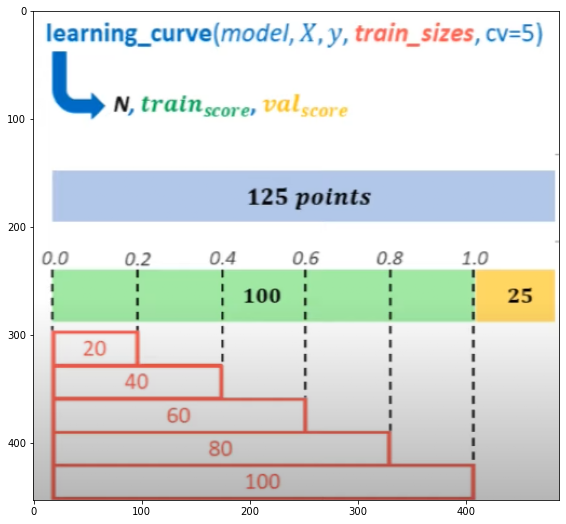

In [55]:
# Donc si mon dataset contient 100 points, j'aurais 20 points dans le premier, 40 dans le second etc..

image = plt.imread('Learning_Curve_Sep.png')
plt.figure(figsize=(12,9))
plt.imshow(image)

In [59]:
# Ces données (le nombre de data par sépration) sont contenu dans la variable N

N, train_score, val_score = learning_curve (model, X_train, y_train, train_sizes = np.linspace(0.2 ,1.0 ,5), cv=5, )

print(N)

# Donc si on découpte X_train & y_train avec ce pourcentage on obtiendra 19 point dans notre premier lot, 38 dans le second, etc

[19 38 57 76 96]


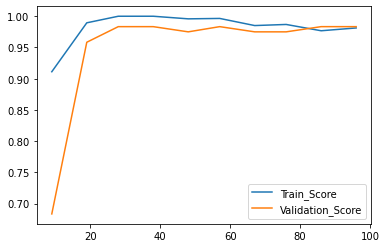

In [62]:
# Si on fait des lots de 10% à 100% avec 10 lots on obtiens la courbe suivante 

N, train_score, val_score = learning_curve (model, X_train, y_train, train_sizes = np.linspace(0.1 ,1.0 ,10), cv=5, )

plt.figure()
plt.plot(N, train_score.mean(axis=1), label='Train_Score')
plt.plot(N, val_score.mean(axis=1), label='Validation_Score')
plt.legend()

# On voit qu'à partir de 80 données notre score évolue très peu, il semble alors inutile de chercher des données supplémentaires

## Une économie de temps et d'argent !